# Выявление закономерностей, определяющих успешность игры


Для планирования рекламных кампаний и определения потенциально популярного продукта нам предстоит проанализировать исторические данные о продажах игр, оценках пользователей и экспертов, жанрах и платформах.
В ходе анализа нам нужно выявить определяющие успешность игры закономерности.

### Описание данных
- Name — название игры
- Platform — платформа
- Year_of_Release — год выпуска
- Genre — жанр игры
- NA_sales — продажи в Северной Америке (миллионы долларов)
- EU_sales — продажи в Европе (миллионы долларов)
- JP_sales — продажи в Японии (миллионы долларов)
- Other_sales — продажи в других странах (миллионы долларов)
- Critic_Score — оценка критиков (максимум 100)
- User_Score — оценка пользователей (максимум 10)
- Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

### Для выполнения поставленных задач выполним следующие шаги:

1. Откроем файлы с данными, изучим общую информацию и подготовим данные
2. Посчитаем суммарные продажи во всех регионах и запишем их в отдельный столбец
3. Проведем исследовательский анализ данных:
    - Посмотрим, сколько игр выпускалось в разные годы. Выделим период, данные по которому важны для принятия решения на 2017 год
    - Посмотрим как менялись продажи по платформам. Выберем платформы с наибольшими суммарными продажами и построим распределение по годам. Выделим характерный срок, за который появляются новые и исчезают старые платформы.
    - Посмотрим, какие платформы лидируют по продажам, растут или падают. Выберем несколько потенциально прибыльных платформ.
    - Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам
    - Посмотрим как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами.
    - Сравним выводы с продажами игр на других платформах.
    - Посмотрим на общее распределение игр по жанрам.
4. Составим портрет пользователя каждого региона - определим для пользователя каждого региона (NA, EU, JP):
    - Самые популярные платформы (топ-5)
    - Самые популярные жанры (топ-5)
    - выясним влияет ли рейтинг ESRB на продажи в отдельном регионе
5. Проверим гипотезы
    - Гипотеза 1. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые
    - Гипотеза 2. Средние пользовательские рейтинги жанров Action и Sports разные
6. На основе проделанной работы сделаем выводы

# Шаг 1. Откроем файлы с данными, изучим общую информацию и подготовим данные

In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
from scipy import stats as st

In [4]:
import matplotlib.pyplot as plt

In [5]:
import seaborn as sns

In [6]:
import warnings
warnings.filterwarnings('ignore')

In [7]:
try:
    games = pd.read_csv('/datasets/games.csv')
except:
    games = pd.read_csv('/Users/elenadolgova/Documents/Yandex praktikum/project5/games.csv')

Взглянем на первые 5 строк таблицы, чтобы посмотреть какие именно данные в ней представлены.

In [8]:
games.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Выведем общую информацию о таблице и посмотрим какие типы данных размещены в таблице:

In [9]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Приведем к нижнему регистру название колонок, чтобы было удобнее читать названия колонок.

In [10]:
games.columns = games.columns.str.lower()

Для колонок, в которых количество уникальных значений меньше 100 выведем уникальные значения в этих колонках, чтобы увидеть пропущенные и выпадающие значения. Отсутствие каких-либо колонок в списке внизу укажет на наличие множества уникальных значений в таких колонках.

In [11]:
for col in games.columns:
    if len(games[col].unique()) < 100:
        print(col,'->', games[col].unique())

platform -> ['Wii' 'NES' 'GB' 'DS' 'X360' 'PS3' 'PS2' 'SNES' 'GBA' 'PS4' '3DS' 'N64'
 'PS' 'XB' 'PC' '2600' 'PSP' 'XOne' 'WiiU' 'GC' 'GEN' 'DC' 'PSV' 'SAT'
 'SCD' 'WS' 'NG' 'TG16' '3DO' 'GG' 'PCFX']
year_of_release -> [2006. 1985. 2008. 2009. 1996. 1989. 1984. 2005. 1999. 2007. 2010. 2013.
 2004. 1990. 1988. 2002. 2001. 2011. 1998. 2015. 2012. 2014. 1992. 1997.
 1993. 1994. 1982. 2016. 2003. 1986. 2000.   nan 1995. 1991. 1981. 1987.
 1980. 1983.]
genre -> ['Sports' 'Platform' 'Racing' 'Role-Playing' 'Puzzle' 'Misc' 'Shooter'
 'Simulation' 'Action' 'Fighting' 'Adventure' 'Strategy' nan]
critic_score -> [76. nan 82. 80. 89. 58. 87. 91. 61. 97. 95. 77. 88. 83. 94. 93. 85. 86.
 98. 96. 90. 84. 73. 74. 78. 92. 71. 72. 68. 62. 49. 67. 81. 66. 56. 79.
 70. 59. 64. 75. 60. 63. 69. 50. 25. 42. 44. 55. 48. 57. 29. 47. 65. 54.
 20. 53. 37. 38. 33. 52. 30. 32. 43. 45. 51. 40. 46. 39. 34. 35. 41. 36.
 28. 31. 27. 26. 19. 23. 24. 21. 17. 22. 13.]
user_score -> ['8' nan '8.3' '8.5' '6.6' '8.4' '8.6' 

Обрабатывать колонки будем по порядку, если их формат данных не соответствует описанию или есть пропущенные значения.

## 1.1 name

Количество уникальных значений в этой колонке значительноe, поэтому посмотрим на пропущенные значения:

In [12]:
games[games['name'].isnull() == True]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Строчек всего две и пропущены значения в жанре и оценках, то есть эти строки не несут полезной информации для нас, поэтому их можно удалить.

In [13]:
games.dropna(subset = ['name'], inplace = True)

In [14]:
games = games.reset_index(drop = True)

## 1.2 year_of_release

Подсчитаем количество строк, в которых пропущен год выхода игры.

In [15]:
len(games[games['year_of_release'].isnull() == True])

269

Таких строк всего 269. Так как игры выходили на разных платформах, то одна и та же игра может быть указана несколько раз в таблице и для нее может быть указан год, который мы и укажем для пропущенного значения. Будем использовать функцию медиану, чтобы внести меньше искажений нашей заменой.

In [16]:
for i in games[games['year_of_release'].isnull() == True].index:  
    games['year_of_release'][i] = games.loc[games['name'] == games['name'][i], 'year_of_release'].median()

In [17]:
len(games[games['year_of_release'].isnull() == True])

146

Теперь их стало меньше. Подсчитаем количество строк где отсутствует год и отсутствует рейтинг критиков.

In [18]:
len(games[(games['year_of_release'].isnull() == True) & (games['critic_score'].isnull() == True)])

84

Из 146 строк 84 не содержит рейтинга, поэтому эти 146 можно целиком удалить - из количество незначительно по сравнению с общим количеством строк.

In [19]:
games.dropna(subset = ['year_of_release'], inplace = True)

In [20]:
games = games.reset_index(drop = True)

Приведем значения в колонке к целочисленным:

In [21]:
games['year_of_release'] = games['year_of_release'].astype('int')

## 1.3 genre

  Посмотрим на уникальные значения в колонке genre.

In [22]:
games['genre'].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy'], dtype=object)

Пропущенные значения ушли в процессе обработки других колонок. Но есть значения `platform`.

Посмотрим какие игры указаны в категории `platform`.

In [23]:
games.query('genre == "Platform"')['name'].head()

1             Super Mario Bros.
6         New Super Mario Bros.
8     New Super Mario Bros. Wii
18            Super Mario World
21             Super Mario Land
Name: name, dtype: object

In [24]:
games.query('genre == "Platform"')['name'].tail()

16209                                      Strider (2014)
16211                                  Goku Makaimura Kai
16453    The Land Before Time: Into the Mysterious Beyond
16560                  Woody Woodpecker in Crazy Castle 5
16565                                    Spirits & Spells
Name: name, dtype: object

Видим что большинство из них можно отнести к категории adventure. Поэтому заменим `Platform` на `Adventure`.

In [25]:
games['genre'] = games['genre'].replace('Platform', 'Adventure')

## 1.4 critic_score и user_score

Подсчитаем количество строк, где одновременно пропущены значения в этих колонках.

In [26]:
(
    len(games[(games['critic_score'].isnull() == True) & 
              (games['user_score'].isnull() == True) & 
              (games['rating'].isnull() == True)])
)

6555

Таких строк около 40% от всей таблицы, просто удалить их нельзя, проведем их обработку.

В колонке `user_score` помимо пропущенних значений есть значение tbd. Предположим, что tbd значит, что игра не получила достаточно оценок, то есть небольшое количество человек написали отзыв, но этого слишком мало, чтобы иметь рейтинг, поэтому будеи считать значение  tbd равносильно отсутствию рейтинга. Заменим tbd на 0.

In [27]:
games['user_score'] = games['user_score'].replace('tbd', 0)

Для `critic_score` и `user_score` проведем замену пропущенных значений медианой по наименованию игры.

In [28]:
score_list = ['critic_score', 'user_score']

In [29]:
for x in score_list:
    try:
        for i in games[games[x].isnull() == True].index:  
            games[x][i] = games.loc[games['name'] == games['name'][i], x].median()
    except:
        0

Пропущенные значения в колонках `critic_score` и `user_score` остались:

In [30]:
len(games[games['critic_score'].isnull() == True])

7532

In [31]:
len(games[games['user_score'].isnull() == True])

6204

Заполнить пропущенные значения на основании данных из таблицы больше не возможно, поэтому оставим их как есть.

Приведем значения в колонке `user_score` к соответствующему типу.

In [32]:
games['user_score'] = pd.to_numeric(games['user_score']).astype('float')

## 1.5 rating

Подсчитаем количество строк, где пропущены значения.

In [33]:
len(games[games['rating'].isnull() == True])

6699

Таких строк много, проведем их обработку. Для этого создадим словарь рейтингов игр и на его основании заполним пропущенные значения.

In [34]:
games_rated = games[games['rating'].isnull() == False][['name', 'rating']]

In [35]:
games_rated.head()

,name,rating
0,Wii Sports,E
2,Mario Kart Wii,E
3,Wii Sports Resort,E
6,New Super Mario Bros.,E
7,Wii Play,E


In [36]:
games_rated = games_rated.drop_duplicates().set_index('name')['rating'].to_dict()

Напишем функцию, которая будет искать по имени игры значение рейтинга в словаре `games_rated`

In [37]:
def fill_rating(row):
    try:
        if pd.isnull(row['rating']):
            return games_rated[row['name']]
        return row['rating']
    except:
        0

In [38]:
games['rating'] = games.apply(fill_rating, axis = 1)

In [39]:
len(games[games['rating'].isnull() == True])

6262

Пропущенные значения по-прежнему есть, но заполнить их на основании данных из таблицы больше не возможно, поэтому оставим их как есть.

#### Вывод:
 - Мы привели данные к нужным типам и исправили ошибки в данных, обработав нулевые значения (там, где это необходимо).

# Шаг 2. Посчитаем суммарные продажи во всех регионах и запишем их в отдельный столбец

In [40]:
games['total_sales'] = games['na_sales'] + games['eu_sales'] + games['jp_sales'] + games['other_sales']

In [41]:
games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Adventure,29.08,3.58,6.81,0.77,NaN,NaN,None,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,None,31.38


# Шаг 3. Проведем исследовательский анализ данных

## 3.1 Посмотрим, сколько игр выпускалось в разные годы. Выделим период, данные по которому важны для принятия решения на 2017 год

Построим гистограмму показывающую сколько игр выходило а каком году. 

In [42]:
d = len(games[games['year_of_release'] > 0]['year_of_release'].unique())

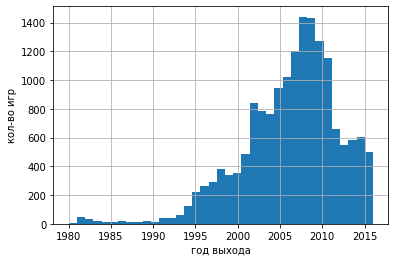

In [43]:
fig, ax = plt.subplots()
ax.set_xlabel('год выхода')
ax.set_ylabel('кол-во игр')
games[games['year_of_release'] > 0]['year_of_release'].hist(bins=d)

#### Вывод:

Как видно из графика, значитальный рост числа игр произошел с 2000 года, поэтому целесообразно анализировать данные с 2000 года.

Рост числа игр с 2000 года объясняется широким распространением компьютеров и их доступностью. Пик игрового рынка приходится на 2008-2009 года - времени мирового финансового кризиса. После этого количество выпускаемых игр начало снижаться, вслед за снижением мировой экономики. Бюджеты разработчиков игр были пересмотрены в сторону сокращения и разработчики игр предпочли более осторожно подходить к выбору игр и оценке их потенциала.

In [44]:
years = (games[games['year_of_release'] >= 2000]['year_of_release']
        .drop_duplicates()
        .sort_values().to_list())

## 3.2 Посмотрим, как менялись продажи по платформам.

Выберем платформы с наибольшими суммарными продажами. 

In [45]:
top_platform = (games
 .pivot_table(index = 'platform', values = 'total_sales', aggfunc = 'sum')
 .sort_values('total_sales', ascending = False)
 .head(5))

In [46]:
top_platform

,total_sales
platform,
PS2,1247.16
X360,966.61
PS3,935.19
Wii,903.31
DS,804.28


 Построим распределение по годам.

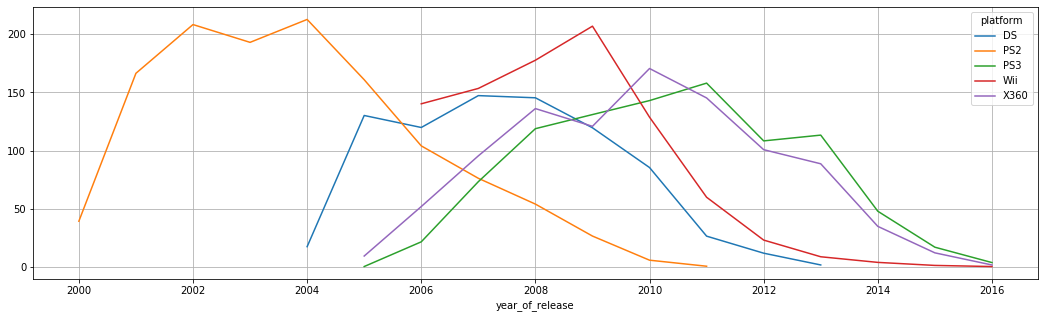

In [47]:
(games[(games['platform'].isin(top_platform.index)) & (games['year_of_release'].isin(years))]
 .pivot_table(index = 'year_of_release', columns = 'platform', values = 'total_sales', aggfunc = 'sum')
 .plot(figsize = (18, 5), grid = True))

Как видно из графика, срок жизни платформы - 10 лет, поэтому сократим период до 10 лет до 2016 года. Поэтому создадим список периодов с 2006 года.

In [48]:
years = years[6:len(years)]

Далее для анализа будем применять не всю таблицу, а только данные по соответствующему периоду, поэтому выделим их в отдельную таблицу `games_modern`.

In [49]:
games_modern = games[games['year_of_release'].isin(years)]

Проверим наличие дубликатов в нашей новой таблице:

In [50]:
games_modern.duplicated().sum()

0

#### Вывод:

- срок жизни платформы - 10 лет

## 3.3. Посмотрим, какие платформы лидируют по продажам, растут или падают.

Выберем несколько потенциально прибыльных платформ. Так как мы планируем на 2017 год, то продажи будем смотреть по 2016 году.

In [51]:
top2016 = (games_modern[games_modern['year_of_release'] == 2016]
 .pivot_table(index = 'platform', values = 'total_sales', aggfunc = 'sum')
 .sort_values('total_sales', ascending = False)
 .head())

In [52]:
top2016

,total_sales
platform,
PS4,69.25
XOne,26.15
3DS,15.14
PC,5.25
WiiU,4.60


Посмотрим, как вели себя продажи по платформам которые мы отобрали.

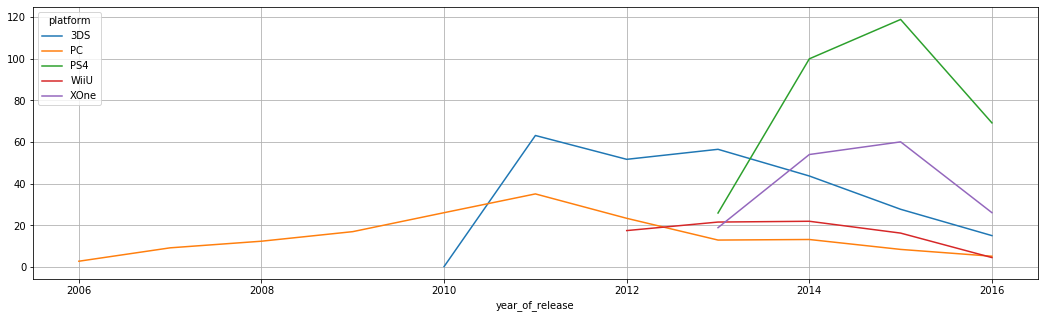

In [53]:
(games_modern[(games_modern['platform'].isin(top2016.index))]
 .pivot_table(index = 'year_of_release', columns = 'platform', values = 'total_sales', aggfunc = 'sum')
 .plot(figsize = (18, 5), grid = True))

Мы отобрали 5 потенциально прибыльных платформ. Стоит отметить, что продажи по всем платформам падают, что соответствует общему тренду на рынке игр.

#### Вывод:

- 5 потенциально прибыльных платформ:

In [54]:
top2016.index.to_list()

['PS4', 'XOne', '3DS', 'PC', 'WiiU']

## 3.4. Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам

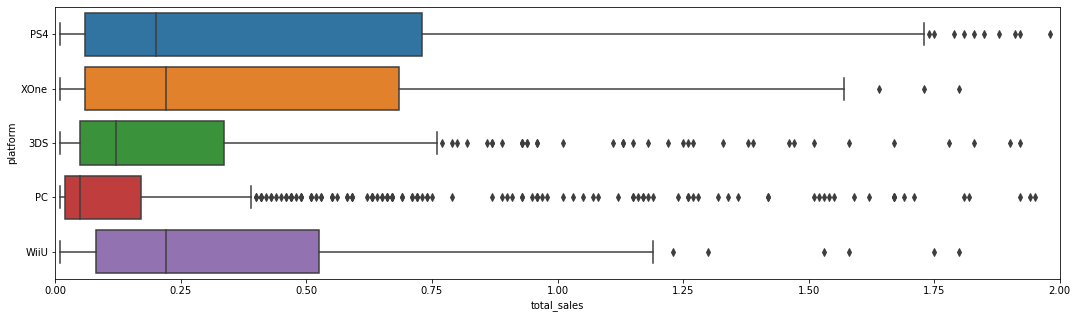

In [55]:
fig, ax = plt.subplots(figsize=(18,5))
plt.xlim(0,2)
(sns
 .boxplot(y = 'platform', x = 'total_sales', 
          data = games[games['platform'].isin(top2016.index)], order = top2016.index))

#### Вывод:

Из графика видно, что продажи игр на приставках разных платформ превышают продажи игр, вышедших на персональных компьютерах. То есть можно сказать, что в игры в основном играют на приставках.
А среди приставок по продажам доминируют 2 платформы - PlayStation и XBox.

## 3.5 Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков

Как мы установили в предыдущем разделе, самая популярная платформа - PS4. Построим для нее диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами.

In [56]:
critics_users_PS4 = (games_modern[(games_modern['critic_score'] > 0) & 
                                  (games_modern['user_score'] > 0) & 
                                  (games_modern['platform'] == 'PS4')])

(0, 100)

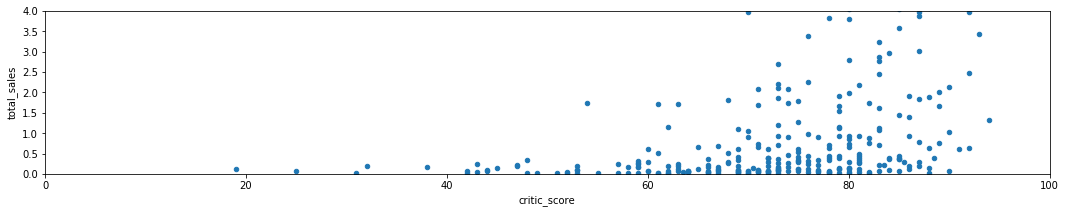

In [57]:
(critics_users_PS4
 .plot(x = 'critic_score', y = 'total_sales', kind = 'scatter', figsize = (18,3)))
plt.ylim(0,4)
plt.xlim(0,100)

(0, 10)

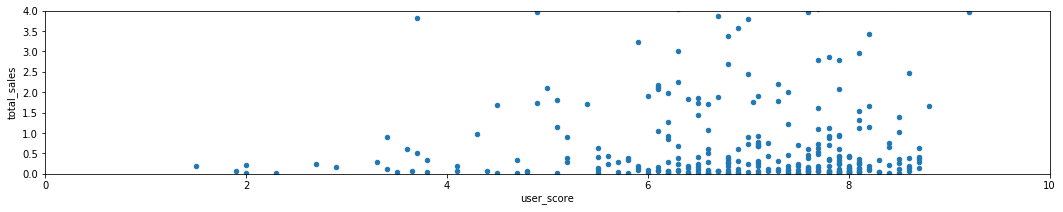

In [58]:
(critics_users_PS4
 .plot(x = 'user_score', y = 'total_sales', kind = 'scatter', figsize = (18,3)))
plt.ylim(0,4)
plt.xlim(0,10)

In [59]:
critics_users_PS4['critic_score'].corr(critics_users_PS4['total_sales'])

0.39003480364443305

In [60]:
critics_users_PS4['user_score'].corr(critics_users_PS4['total_sales'])

-0.018810343855968505

#### Вывод:

Как видно из первого графика, точки собираются кучнее, их разброс невелик и точек в правой верхней части графика больше чем на графике 2 (то есть игры с большим количеством продаж имеют высокие оценки критиков). Это подтверждается коэффициентом корреляции, который для критиков значительно больше, чем для оценок пользователей. Иными словами, доверять оценкам критиков следует больше, чем оценкам пользователей если речь идет о прибыльности игры.

## 3.6 Соотнесем выводы с продажами игр на других платформах.

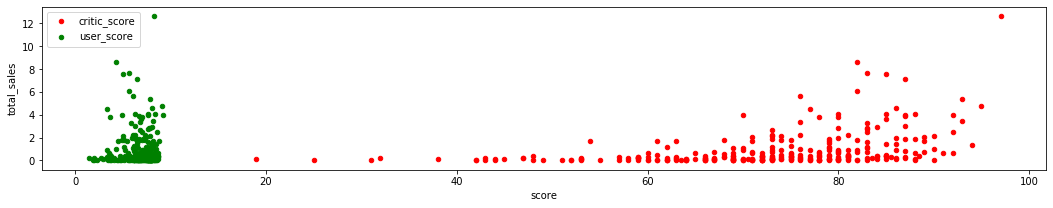

['PS4'] 0.39003480364443305 -0.018810343855968505


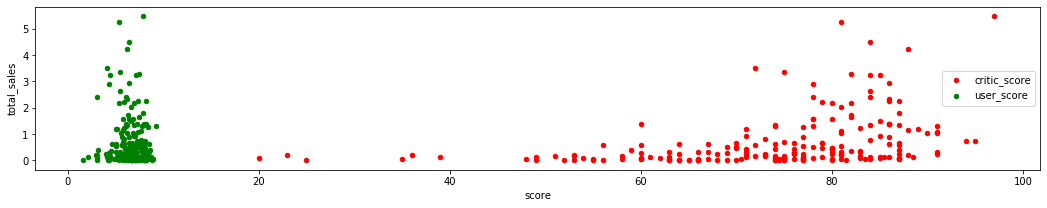

['XOne'] 0.37068927832094356 -0.09427554300899244


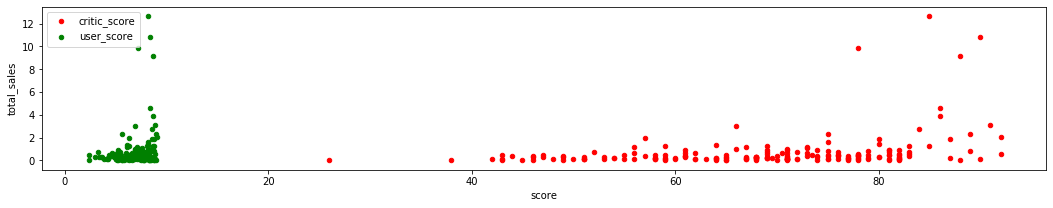

['3DS'] 0.31257999908048295 0.21889918250726015


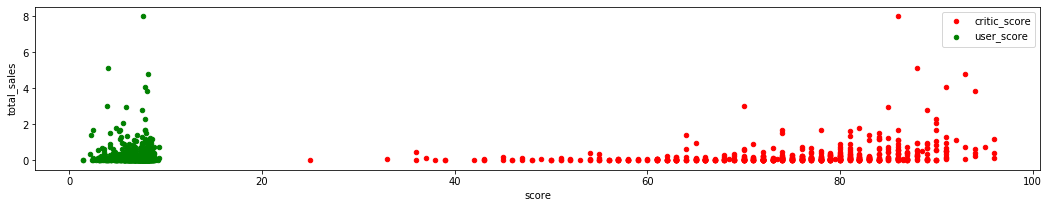

['PC'] 0.2808176278928316 -0.021349610923794893


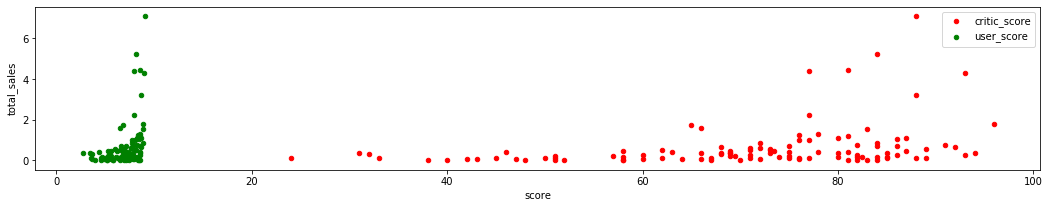

['WiiU'] 0.32585905702843004 0.37556669995745395


In [61]:
for item in top2016.index:
    item = (games_modern[(games_modern['critic_score'] > 0) & 
                         (games_modern['user_score'] > 0) & 
                         (games_modern['platform'] == item)])
    ax = (item.plot(x = 'critic_score', y = 'total_sales', kind = 'scatter', 
                    figsize = (18,3), c = 'Red', label = 'critic_score'))
    (item.plot(x = 'user_score', y = 'total_sales', kind = 'scatter', 
               figsize = (18,3), ax = ax, c = 'Green', label = 'user_score'))
    ax.set_xlabel('score')
    plt.show()
    print(item['platform'].unique(), item['critic_score'].corr(item['total_sales']), 
          item['user_score'].corr(item['total_sales']))

#### Вывод:

Как видно из графиков и коэффициентов корреляции выводы для самой популярной платформы PS4 актуальны и для платформ XOne и PC. 
Однако для платформ производителя Nintendo - 3DS и WiiU - продажи игр коррелируют и с оценками критиков и с оценками пользователей, то есть можно сделать общий вывод: для любой платформы оценки критиков являются надежным показателем при анализе продаж,  а оценки пользователей таковыми не являются.
Это можно объяснить тем, что у критиков есть определенные критерии и подход к оценке любых игр, в то время как пользователи ориентируются больше на личные впечатления и исходя из своих жанровых предпочтений.

## 3.7 Посмотрим на общее распределение игр по жанрам.

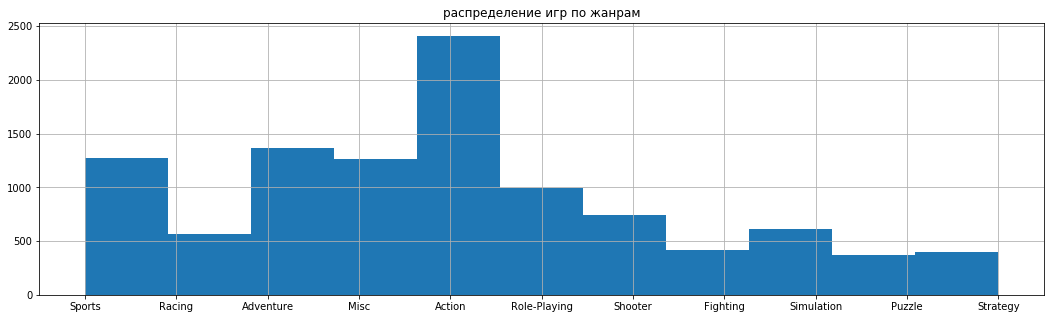

In [62]:
games_modern['genre'].hist(figsize = (18,5), bins = len(games['genre'].unique()))
plt.title('распределение игр по жанрам')
plt.show()

Самыми популярными являются Action, Advenure и Sports.

Посмотрим какие жанры наиболее прибыльны, а какие нет.

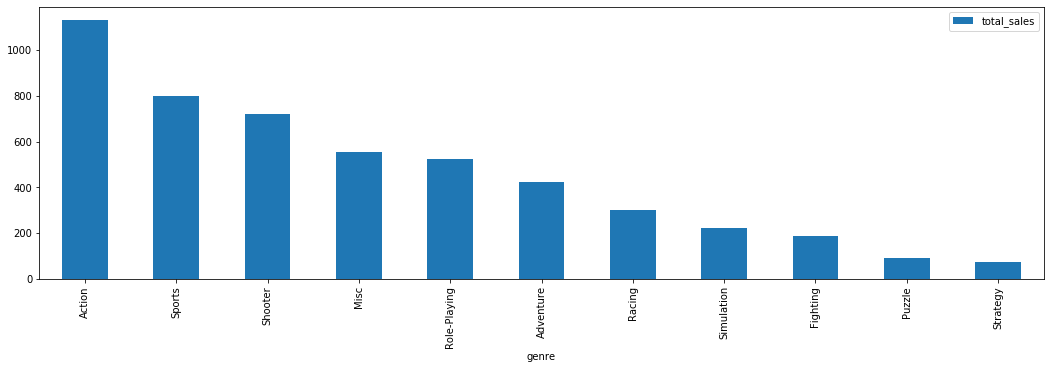

In [63]:
(games_modern
 .pivot_table(index = 'genre', values = 'total_sales', aggfunc = 'sum')
 .sort_values('total_sales', ascending = False)
 .plot(figsize = (18,5), kind = 'bar'))

#### Вывод:

Самыми прибыльными являются самые популярные жанры, что объясняется тем, что производители игр делают упор на самые продаваемые жанры.
Наименее прибыльными являются стратегии, загадки, единоборства и простые симуляторы, что объяснимо, так как такие жанры либо требуют умственного напряжения и не являются настолько развлекательными как топовые жанры, либо уже пережили свой век популярности (единоборства).

Построим боксплоты для топ-3 самых прибыльных жанров.

In [64]:
top_genres = (games_modern
              .pivot_table(index = 'genre', values = 'total_sales', aggfunc = ['sum','count'])
              .sort_values(('sum','total_sales'), ascending = False)
              .head(3))

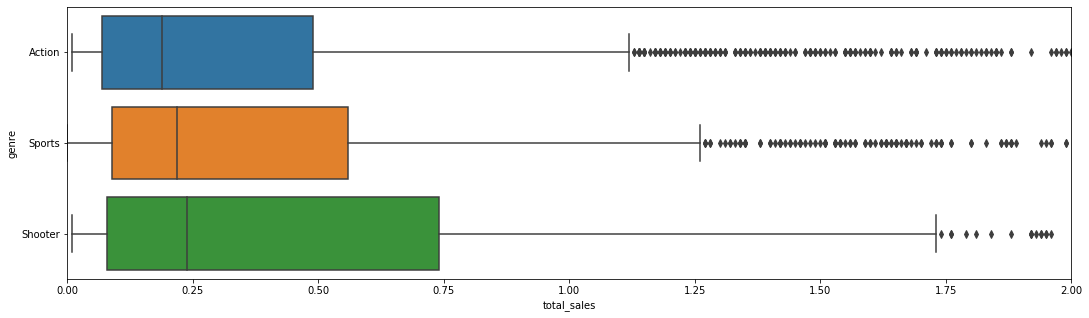

In [65]:
fig, ax = plt.subplots(figsize=(18,5))
plt.xlim(0,2)
(sns
 .boxplot(y = 'genre', x = 'total_sales', 
          data = games[games['genre'].isin(top_genres.index)], order = top_genres.index))

Посмотрим на количество выпущенных игр соответствующих жанров.

Text(0, 0.5, 'Кол-во игр')

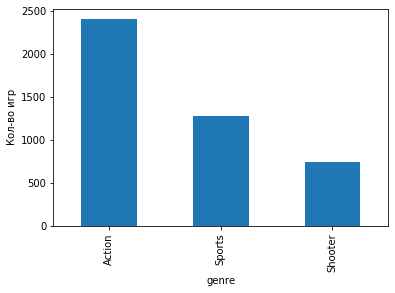

In [66]:
ax = top_genres['count']['total_sales'].plot(kind = 'bar')
ax.set_ylabel('Кол-во игр')

#### Вывод: 

Поскольку медианы всех трех жанров отличаются незначительно (игры разных жанров можно сказать стоят одинаково), то отличие в выручке между ними обусловлено количеством выпущенных игр. Лидер по выручке - Action хоть и имеет стоимость игры меньшую, чем у остальных жанров, зато игры Action выпускались в таком огромном количестве, что и обеспечило доминирование по выручке.

# Шаг 4. Составим портрет пользователя каждого региона

Определим для пользователя каждого региона (NA, EU, JP):

- самые популярные платформы (топ-5)
- самые популярные жанры (топ-5)
- выясним влияет ли рейтинг ESRB на продажи в отдельном регионе?

## 4.1 Топ-5 самых популярных платформ

Построим для каждого региона топ-5 платформ по выручке.

In [67]:
regions = ['na_sales', 'eu_sales', 'jp_sales']

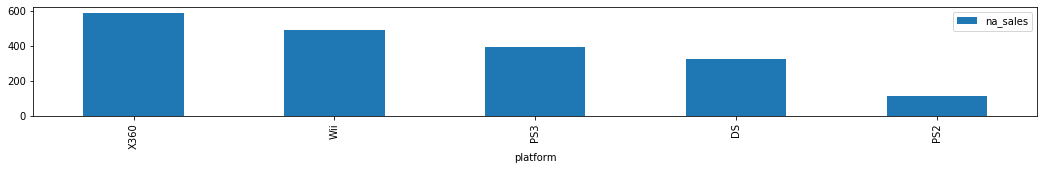

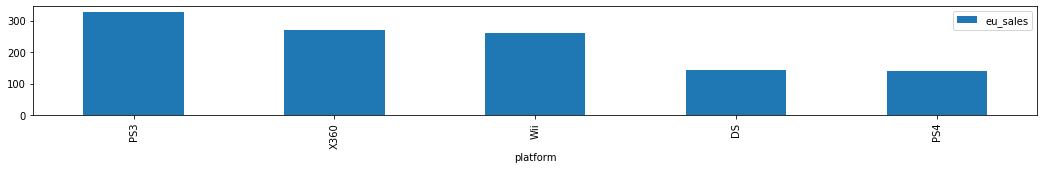

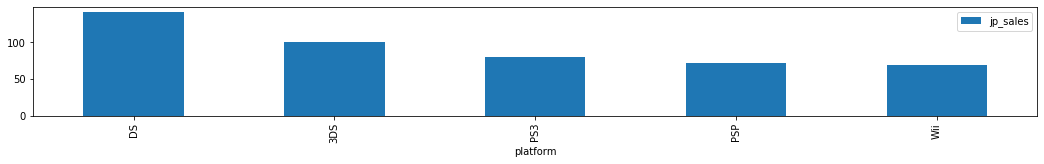

In [68]:
for item in regions:
    (games_modern
     .pivot_table(index = 'platform', values = item, aggfunc = 'sum')
     .sort_values(item, ascending = False)
     .head(5)
     .plot(kind = 'bar', figsize = (18,2)))

#### Вывод:

Как видно из графиков, в Северной Америке доминирует платформа местного производителя - Microsoft. Остальные платформы принадлежат японским производителям.

В Европе, где нет собственного производителя приставок, потребитель делает выбор в пользу японского производителя, что может объясняться ценовой доступностью.

И в самой Японии у неместных производителей просто нет шансов - там топ продаж составляют исключительно местные производители.

## 4.2 Топ-5 самых популярных жанров

Построим для каждого региона топ-5 жанров по выручке.

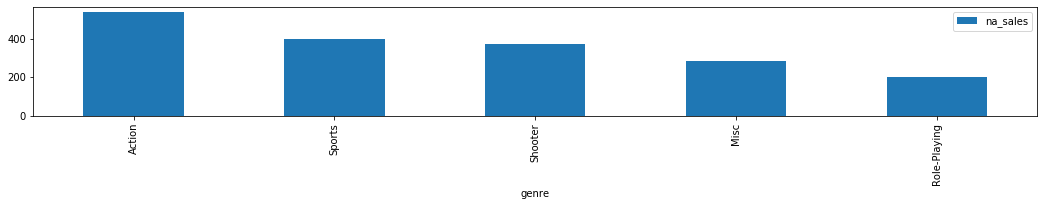

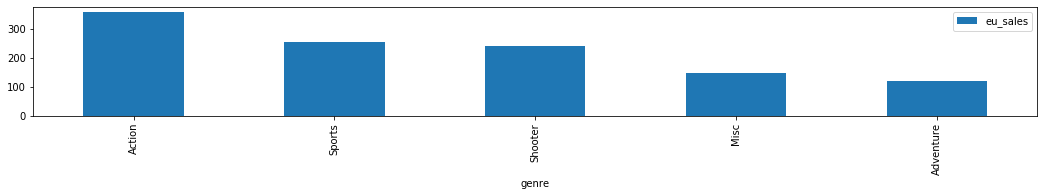

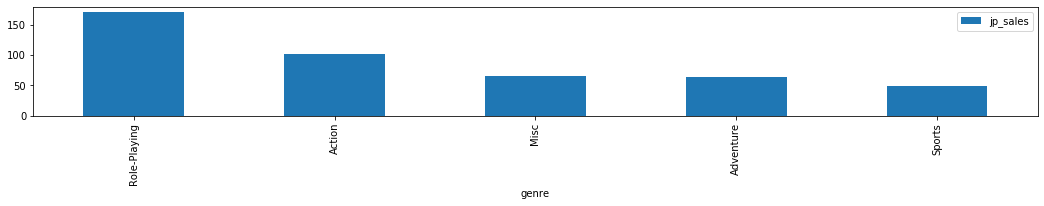

In [69]:
for item in regions:
    (games_modern
     .pivot_table(index = 'genre', values = item, aggfunc = 'sum')
     .sort_values(item, ascending = False)
     .head(5)
     .plot(kind = 'bar', figsize = (18,2)))

#### Вывод:

Как видно из графиков, в Северной Америке и Европе игры покупают практически одинаковых жанров. Предпочтения этих двух регионов очень схожи - там любят игры где много действия, событий, стрельбы и спортивных состязаний.

А вот в Японии предпочитают управлять игровыми персонажами (вероятно поэтому они и придумали Тамагочи). Шутеры в Японии вообще оказались непопулярны - глядя на плотность населения можно было предположить, что они не прочь сократить количество хотя бы виртуальных персонажей.

## 4.3 Проверим влияет ли рейтинг ESRB на продажи в отдельном регионе

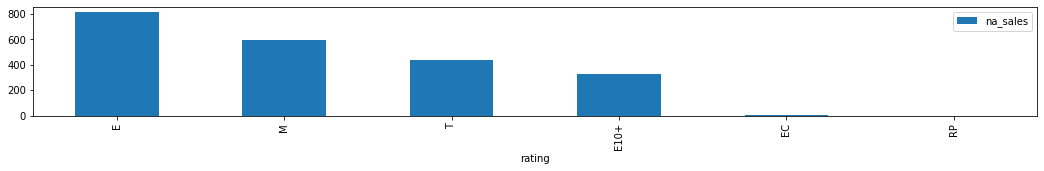

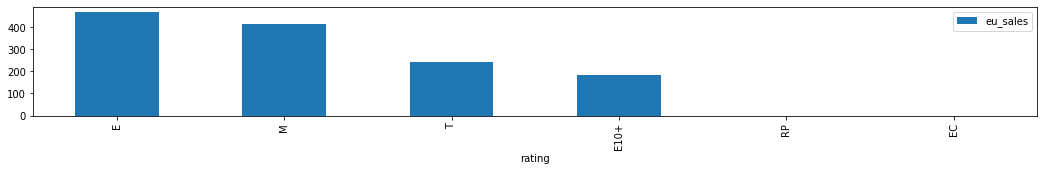

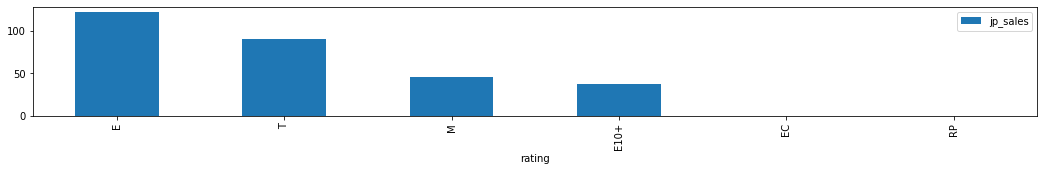

In [70]:
for item in regions:
    (games_modern
     .pivot_table(index = 'rating', values = item, aggfunc = 'sum')
     .sort_values(item, ascending = False)
     .plot(kind = 'bar', figsize = (18,2)))

#### Вывод:

Как видно из графиков, предпочтения Северной Америки и Европы вновь совпадают - совпадения по рейтингам также связано с совпадениями по жанрам, видимо игры с действиями и стрельбой попадают в категорию для тех, кто постраше - M.

А вот японцы выбирают игры без насилия для широкого круга игроманов и подростков. Поскольку жанры Action и Sports требуют рейтинг M, то у японцев (у которых они не слишком популярны) этот рейтинг только на третьем месте по продажам.

Как итог, несмотря на небольшое различие в выборе платформ для игр, пользователи в Северной Америке и Европе очень похожи по игровым предпочтениям, а вот их коллеги из Японии кардинально от них отличаются и по склонности к местным платформам и по выбору жанров для игр.

# Шаг 5. Проверим гипотезы

## 5.1 Гипотеза 1. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

#### Выбор статистического теста:

Нам требуется проверить отличаются ли средние пользовательские рейтинги двух платформ. Информацию о пользовательских рейтингах этих двух платформ можно рассматривать как две генеральные совокупности. Для того, чтобы проверить гипотезу о равенстве среднего двух генеральных совокупностей применяется метод scipy.stats.ttest_ind().

Для этого сформулируем нулевую гипотезу: cредние пользовательские рейтинги платформы Xbox One равны cредним пользовательским рейтингам платформы PC.

В таком случае альтернативная гипотеза будет: cредние пользовательские рейтинги платформы Xbox One НЕ равны cредним пользовательским рейтингам платформы PC.

Соберем пользовательские рейтинги по двум платформам в таблицы.

In [71]:
XOne_user_score = (games_modern[(games_modern['platform'] == 'XOne') & 
                                (games_modern['user_score'] > 0)]['user_score'])

In [72]:
PC_user_score = (games_modern[(games_modern['platform'] == 'PC') & 
                                (games_modern['user_score'] > 0)]['user_score'])

Проверим насколько отличаются дисперсии двух выборок - `XOne_user_score` и `PC_user_score`

In [73]:
np.var(XOne_user_score)

1.899683972626955

In [74]:
np.var(PC_user_score)

2.294850802901608

Дисперсии отличаются, значит нет оснований полагать, что выборки взяты из схожих по параметрам совокупностей, следовательно, для теста необходимо использовать параметр `equal_var = False`

В качестве критического уровня значимость обычно берут 1% или 5%. Мы выберем 5% для того, чтобы уменьшить область, где мы не отвергаем гипотезу (или обратно - увеличить область, где мы отвергаем гипотезу).

In [75]:
alpha = 0.05

In [76]:
result1 = st.ttest_ind(PC_user_score, PC_user_score, equal_var = False)

In [77]:
result1.pvalue

1.0

In [78]:
if (result1.pvalue < alpha):
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

Не получилось отвергнуть нулевую гипотезу


Нулевую гипотезу отвергнуть не получилось, то есть мы не можем сказать что cредние пользовательские рейтинги платформы Xbox One отличаются от cредних пользовательских рейтингов платформы PC.

## 5.2 Гипотеза 2. Средние пользовательские рейтинги жанров Action и Sports разные

Сформулируем нулевую гипотезу: cредние пользовательские рейтинги жанра Action равны средним пользовательским рейтингам жанра Sports.

В таком случае альтернативная гипотеза будет: cредние пользовательские рейтинги жанра Action НЕ равны средним пользовательским рейтингам жанра Sports.

Соберем пользовательские рейтинги по двум жанрам в таблицы.

In [79]:
Action_user_score = (games_modern[(games_modern['genre'] == 'Action') & 
                                  (games_modern['user_score'] > 0)]['user_score'])

In [80]:
Sports_user_score = (games_modern[(games_modern['genre'] == 'Sports') & 
                                  (games_modern['user_score'] > 0)]['user_score'])

Проверим насколько отличаются дисперсии двух выборок - `Action_user_score` и `Sports_user_score`

In [81]:
np.var(Action_user_score)

1.8762123620789273

In [82]:
np.var(Sports_user_score)

2.745595368544084

Дисперсии отличаются, значит нет оснований полагать, что выборки взяты из схожих по параметрам совокупностей, следовательно, для теста необходимо использовать параметр `equal_var = False`

In [83]:
result2 = st.ttest_ind(Action_user_score, Sports_user_score, equal_var = False)

In [84]:
result2.pvalue

8.008133272240541e-12

In [85]:
if (result2.pvalue < alpha):
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

Отвергаем нулевую гипотезу


Принять нулевую гипотезу не получается, то есть cредние пользовательские рейтинги жанра Action и средние пользовательские рейтинги жанра Sports различаются.

### Вывод:

Мы задали пороговое значение alpha = 5% и сформулировали нулевые гипотезы:
 - cредние пользовательские рейтинги платформы Xbox One равны cредним пользовательским рейтингам платформы PC
 - cредние пользовательские рейтинги жанра Action равны средним пользовательским рейтингам жанра Sports.
 
Альтернативные гипотезы были сформулированы следующим образом:
 - cредние пользовательские рейтинги платформы Xbox One НЕ равны cредним пользовательским рейтингам платформы PC.
 - cредние пользовательские рейтинги жанра Action НЕ равны средним пользовательским рейтингам жанра Sports.

В результате проделанного анализа:
 - Нулевая гипотеза (средние пользовательские рейтинги платформы Xbox One равны cредним пользовательским рейтингам платформы PC) не отвергнута, то есть мы не можем сказать что cредние пользовательские рейтинги платформы Xbox One отличаются от cредних пользовательских рейтингов платформы PC.
 - Нулевая гипотеза (cредние пользовательские рейтинги жанра Action равны средним пользовательским рейтингам жанра Sports)не принята, то есть cредние пользовательские рейтинги жанра Action и средние пользовательские рейтинги жанра Sports различаются.

## Шаг 6. Общий вывод

#### В ходе работы мы проделали следующие шаги:

- привели данные к нужным типам и исправили ошибки в данных, обработав нулевые значения
- посчитали суммарные продажи во всех регионах
- посмотрели, сколько игр выпускалось в разные годы
- выделили период, данные по которому важны для принятия решения на 2017 год - с 2006 года
- посмотрели как менялись продажи по платформам
- выбрали платформы с наибольшими суммарными продажами и построили распределение по годам
- выделили характерный срок, за который появляются новые и исчезают старые платформы - 10 лет
- посмотрели какие платформы лидируют по продажам, растут или падают
- выбрали несколько потенциально прибыльных платформ
- посмотрели как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. 
- сравнили выводы с продажами игр на других платформах
- проанализировали общее распределение игр по жанрам
- составили портрет пользователя каждого региона
   
#### На основе проделанной работы сделали выводы:

 - значительный рост числа игр произошел с 2000 года
 - срок жизни платформы - 10 лет
 - 5 потенциально прибыльных платформ - 'PS4', 'XOne', '3DS', 'PC', 'WiiU'
 - продажи игр на приставках разных платформ превышают продажи игр, вышедших на персональных компьютерах
 - среди приставок по продажам доминируют 2 платформы - PlayStation и XBox
 - для любой платформы оценки критиков являются надежным показателем при анализе продаж, а оценки пользователей таковыми не являются
 - самыми прибыльными являются самые популярные жанры - Action, Sports, Shooter

###### На основе проделанной работы составили портрет пользователя каждого региона 
- в Северной Америке доминирует платформа местного производителя - Microsoft. Остальные платформы принадлежат японским производителям.
- в Европе потребитель делает выбор в пользу японского производителя.
- в Японии топ продаж составляют исключительно местные производители.
- в Северной Америке и Европе игры покупают практически одинаковых жанров. Предпочтения этих двух регионов очень схожи - там любят игры где много действия, событий, стрельбы и спортивных состязаний.
- в Японии предпочитают управлять игровыми персонажами. Шутеры в Японии вообще оказались непопулярны.
- предпочтения Северной Америки и Европы совпадают - совпадения по рейтингам также связано с совпадениями по жанрам, видимо игры с действиями и стрельбой попадают в категорию для тех, кто постраше - M.
- японцы выбирают игры без насилия для широкого круга игроманов и подростков. Поскольку жанры Action и Sports требуют рейтинг M, то у японцев (у которых они не слишком популярны) этот рейтинг только на третьем месте по продажам.

Как итог, несмотря на небольшое различие в выборе платформ для игр, пользователи в Северной Америке и Европе очень похожи по игровым предпочтениям, а вот их коллеги из Японии кардинально от них отличаются и по склонности к местным платформам и по выбору жанров для игр.

##### Для выявление закономерностей, определяющих успешность игры, мы сформулировали гипотезы и проверили их.